In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_red = pd.read_csv('/home/zorro/VM/Itog/winequality-red.csv', delimiter=';')
data_white = pd.read_csv('/home/zorro/VM/Itog/winequality-white.csv', delimiter=';')
df_r = pd.DataFrame(data_red)
df_w = pd.DataFrame(data_white)

In [5]:
#проверка датасета на пустые значения красного и белого вина
df_r.isnull().sum()
df_w.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

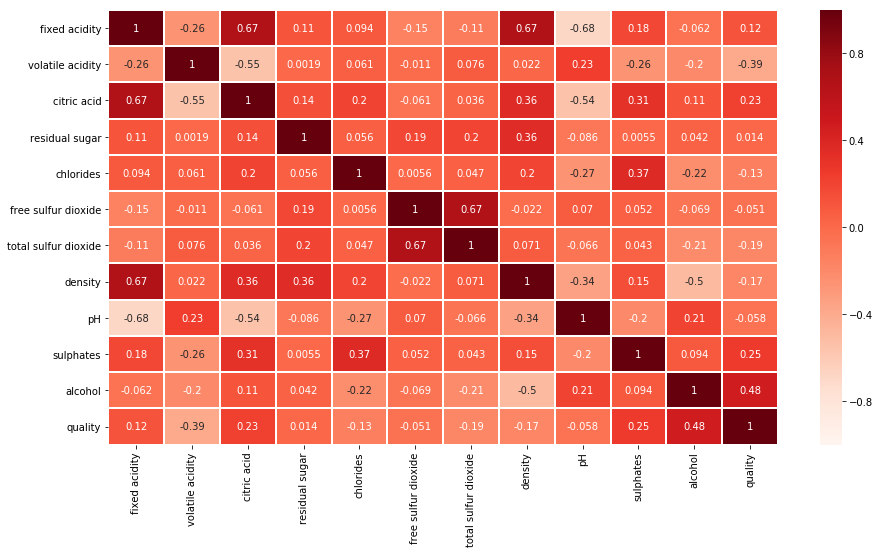

In [39]:
#Корреляция между разными показателями для красного вина
corr_r = df_r.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr_r, annot=True, linewidths=1, vmin=-1, cmap="Reds")


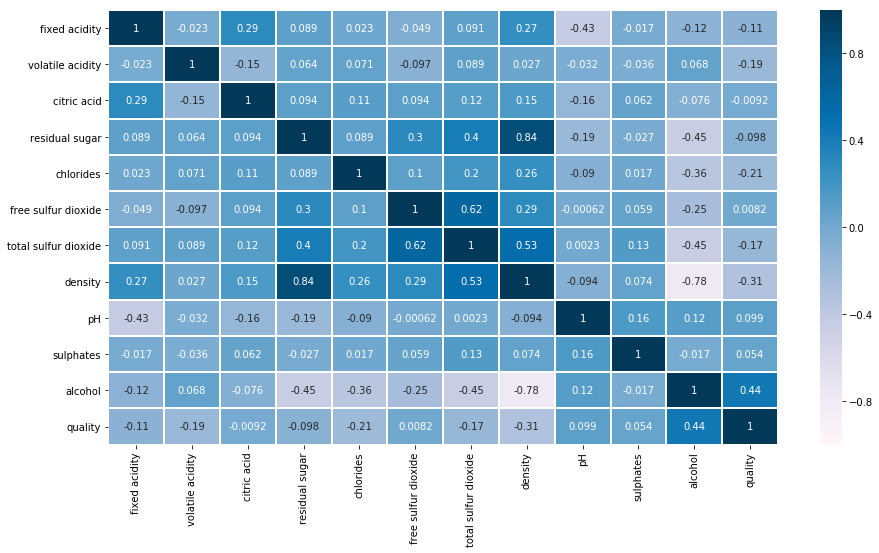

In [40]:
#Корреляция между разными показателями для красного вина
corr_w = df_w.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr_w, annot=True, linewidths=1, vmin=-1, cmap="PuBu")


In [85]:
#Влияет на качество по убыванию (Красное):
corr_r['quality'] = abs(corr_r['quality'])
corr_r['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed acidity           0.124052
pH                      0.057731
free sulfur dioxide     0.050656
residual sugar          0.013732
Name: quality, dtype: float64

In [86]:
#Влияет на качество по убыванию (белое):
corr_w['quality'] = abs(corr_w['quality'])
corr_w['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
density                 0.307123
chlorides               0.209934
volatile acidity        0.194723
total sulfur dioxide    0.174737
fixed acidity           0.113663
pH                      0.099427
residual sugar          0.097577
sulphates               0.053678
citric acid             0.009209
free sulfur dioxide     0.008158
Name: quality, dtype: float64

In [46]:
#Сравнение что больше влияет на качества для красного и белого вина
corr_qr = corr_r['quality']
corr_qw= corr_w['quality']
frames = [corr_qr, corr_qw]
corr_b = pd.concat(frames, axis=1)
corr_b
# например лимонная кислота в белом вине меньше влияет на качество чем в красном


,quality,quality
fixed acidity,0.124052,-0.113663
volatile acidity,-0.390558,-0.194723
citric acid,0.226373,-0.009209
residual sugar,0.013732,-0.097577
chlorides,-0.128907,-0.209934
free sulfur dioxide,-0.050656,0.008158
total sulfur dioxide,-0.185100,-0.174737
density,-0.174919,-0.307123
pH,-0.057731,0.099427
sulphates,0.251397,0.053678


In [87]:
from patsy import dmatrices
import sklearn
import sklearn.metrics
from sklearn import ensemble
from sklearn import linear_model

#переименование столбцов
df_r.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid','volatile acidity':'volatile_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

a=''
for i in df_r.columns:
    a=a+i+'+'
print(a)
#Анализ качества красного линейной регрессией:
model = sklearn.linear_model.LogisticRegression()
y,X = dmatrices('quality ~ fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates+alcohol', data = df_r)
model.fit(X, y)
yhat = model.predict(X)
print(sklearn.metrics.classification_report(y, yhat))
# метод хорошо определяет среднее качество и плохо хорошее и плохое вино



fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates+alcohol+quality+
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00        10
         4.0       0.00      0.00      0.00        53
         5.0       0.64      0.76      0.70       681
         6.0       0.53      0.63      0.57       638
         7.0       0.53      0.09      0.15       199
         8.0       0.00      0.00      0.00        18

   micro avg       0.59      0.59      0.59      1599
   macro avg       0.28      0.25      0.24      1599
weighted avg       0.55      0.59      0.55      1599



/home/zorro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/zorro/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/zorro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/zorro/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/zorr

In [88]:
# метод - лес решений:
model = sklearn.ensemble.RandomForestClassifier()
model.fit(X, y)
yhat = model.predict(X)
print(sklearn.metrics.classification_report(y, yhat))
# Этот метод гораздо точнее определяет качество вина

              precision    recall  f1-score   support

         3.0       1.00      0.90      0.95        10
         4.0       1.00      0.92      0.96        53
         5.0       0.98      1.00      0.99       681
         6.0       0.99      0.98      0.98       638
         7.0       1.00      0.97      0.98       199
         8.0       1.00      1.00      1.00        18

   micro avg       0.99      0.99      0.99      1599
   macro avg       0.99      0.96      0.98      1599
weighted avg       0.99      0.99      0.99      1599



/home/zorro/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/zorro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
